In [ ]:
import torch
from PIL import Image
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights, vgg19_bn, VGG19_BN_Weights

# Using pretrained weights:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
model.eval()

model_vgg = vgg19_bn(weights=VGG19_BN_Weights.IMAGENET1K_V1)
model_vgg.eval()

In [22]:
def inference_resnet(input_image):
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalization with mean and std of imagenet
    ])
    input_tensor = preprocess(input_image) # preprocess with expected parameter for resnet50 with imagenet weights
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


    with torch.no_grad():
        output = model(input_batch)
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

    # Read the categories
    with open("data/imagenet_classes.txt", "r") as f:
        categories = [s.strip() for s in f.readlines()]
    # Show top categories per image
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    result = {}
    for i in range(top5_prob.size(0)):
        result[categories[top5_catid[i]]] = top5_prob[i].item()
    return result

def inference_vgg(input_image):
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalization with mean and std of imagenet
    ])
    input_tensor = preprocess(input_image) # preprocess with expected parameter for resnet50 with imagenet weights
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


    with torch.no_grad():
        output = model_vgg(input_batch)
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

    # Read the categories
    with open("data/imagenet_classes.txt", "r") as f:
        categories = [s.strip() for s in f.readlines()]
    # Show top categories per image
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    result = {}
    for i in range(top5_prob.size(0)):
        result[categories[top5_catid[i]]] = top5_prob[i].item()
    return result

In [29]:
img = Image.open("data/images/school.jpg")
inference_resnet(img)

{'seashore': 0.47188302874565125,
 'valley': 0.1529495269060135,
 'lakeside': 0.14880098402500153,
 'promontory': 0.03472931310534477,
 'airliner': 0.03291342779994011}

{'valley': 0.23378302156925201, 'seashore': 0.21896758675575256, 'alp': 0.16184568405151367, 'lakeside': 0.1301877498626709, 'promontory': 0.029115237295627594}


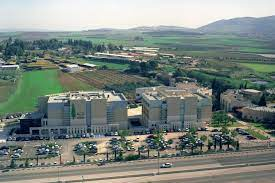

In [31]:
print(inference_vgg(img))
img